In [3]:
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly.graph_objs import *
import colorlover as cl

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 导入数据
data = pd.read_csv('HR_comma_sep.csv')
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
colors = ['#e43620', '#f16d30','#d99a6c','#fed976', '#b3cb95', '#41bfb3','#229bac', '#256894']

In [8]:
print('共有', data.shape[0], '条员工记录', data.shape[1], '个员工特征')

共有 14999 条员工记录 10 个员工特征


In [10]:
# 检查是否有缺失值
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
# 通过适当的改名来直观的理解和获取特征列
df = data.rename(columns={'sales':'department', 'promotion_last_5years':'promotion', 'Work_accident':'work_accident'})
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion', 'department', 'salary'],
      dtype='object')

In [13]:
# 查看数据的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    14999 non-null  float64
 1   last_evaluation       14999 non-null  float64
 2   number_project        14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   left                  14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
# 展示所有类型特征的信息
df.describe(include=['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


## 1.5类别数字化

 1. 先设置`salary`与`department`列为Category的数据类型
 2. 保存类别与对应数值的映射字典
 3. 针对`salary`和`department`这两个`Object`类型的**类别**特征，将其进行类别数字化。

In [15]:
# 1. 先设置salary与department列为category的数据类型
df['department'] = df['department'].astype('category')
df['salary'] = df['salary'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   satisfaction_level    14999 non-null  float64 
 1   last_evaluation       14999 non-null  float64 
 2   number_project        14999 non-null  int64   
 3   average_montly_hours  14999 non-null  int64   
 4   time_spend_company    14999 non-null  int64   
 5   work_accident         14999 non-null  int64   
 6   left                  14999 non-null  int64   
 7   promotion             14999 non-null  int64   
 8   department            14999 non-null  category
 9   salary                14999 non-null  category
dtypes: category(2), float64(2), int64(6)
memory usage: 967.3 KB


In [17]:
# 2. 保存类别与对应数值的映射字典
salary_dict = dict(enumerate(df['salary'].cat.categories))
department_dict = dict(enumerate(df['department'].cat.categories))
salary_dict, department_dict

({0: 'high', 1: 'low', 2: 'medium'},
 {0: 'IT',
  1: 'RandD',
  2: 'accounting',
  3: 'hr',
  4: 'management',
  5: 'marketing',
  6: 'product_mng',
  7: 'sales',
  8: 'support',
  9: 'technical'})

In [20]:
# 3. 针对salary和department这两个object类型的类别特征，将其进行类别数字化
for feature in df.columns:
    if str(df[feature].dtype) == 'category':
          df[feature] = df[feature].cat.codes

          df[feature] = df[feature].astype('int64') # 设置数据累心为int64

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


### 1.6 改变columns顺序
1. 先设置columns的顺序
 - 将`left`列放置于最后一列以方便直观地查看
2. 根据排好的列表顺序应用于dataframe上

In [23]:
cols = df.columns
cols = list(cols[:6]) + list(cols[7:]) + [cols[6]]
print('Reordered Columns', cols)

Reordered Columns ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion', 'department', 'salary', 'left']


In [24]:
# 根据排好的列表顺序应用于dataframe上
df = df[cols]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1


In [25]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    14999 non-null  float64
 1   last_evaluation       14999 non-null  float64
 2   number_project        14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   promotion             14999 non-null  int64  
 7   department            14999 non-null  int64  
 8   salary                14999 non-null  int64  
 9   left                  14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


((14999, 10), None)

## 2. 数据探索分析

### 2.1 描述性分析
对`left`列进行group,进行描述性分析
查看在职与离职类别下，每个特征的均值

In [26]:
left_summary = df.groupby(by=['left'])
left_summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


In [28]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion,department,salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,5.870525,1.347290,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.868786,0.625819,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,2.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


### 2.2. 相关性分析
根据热力图显示，可以发现：

- `满意度(satisfaction_level）`
	- 员工**满意度**（satisfaction_level）离职（left）呈较大**负相关**（-）关系，与**完成项目数**（number_project）、**在公司的年份**（time_spend_company）也有一定的负相关性。
- `绩效评估(last_evaluation)`
	- 上一次的**绩效评估**(last_evaluation)与**完成项目数**（number_project）和**平均每月工作时间**（average_montly_hours）这两个特征呈较大的**正相关**（+）关系,也就是说，完成项目数越多，平均每月工作时长越长，员工能获得更高的评价。
	- 但绩效评估与工资，晋升都没有什么相关性，所以员工得到了高绩效评价也不会升职或者涨工资。
- `离职（left）`
	- 离职率与员工**满意度**（satisfaction_level）、过去5年是否有**晋升**（promotion_last_5years）、是否有**工伤**（work_accident）、**工资薪酬**（salary）呈**负相关**（-）关系。如果员工对公司不太满意，且个人价值实现不高，那么离职的可能性会很大。
	- 离职率与员工的**在公司的年份**（time_spend_company）呈较大**正相关**（+）关系。与**平均每月工作时间**（average_montly_hours），所在**部门**（department）也呈些许正相关性。

In [30]:
corr = df.corr() # pearson相关系数
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)]=True

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

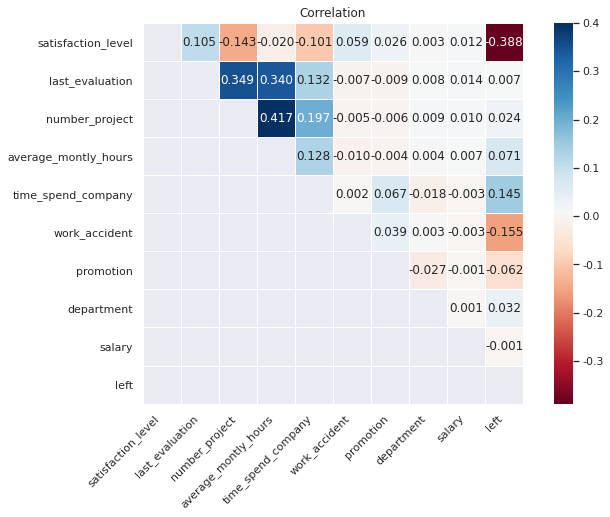

In [31]:
with sns.axes_style('white'):
    sns.set(rc={'figure.figsize':(11,7)})
    ax = sns.heatmap(corr,
                    xticklabels=True, yticklabels=True,
                    cmap='RdBu', # cmap='Y1GnBu' # 颜色
                    mask=mask, # 使用掩码只绘制矩阵的一部分
                    fmt='.3f', # 格式设置
                    annot=True, # 方格内写入数据
                    linewidths=.5, # 热力图矩阵之间的间隔大小
                    vmax=.4, # 图例中最大值
                    square=True)
    
plt.title('Correlation')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')


### 2.3 变量分析
#### 2.3.1 公司当前员工离职与在职的比率

In [35]:
left_count = df['left'].value_counts().reset_index(name='left_count')
left_count

,index,left_count
0,0,11428
1,1,3571


In [40]:
trace = Pie(labels=['在职','离职'], values=left_count.left_count,
           hoverinfo='label + percent + name',
           marker = dict(colors=colors[3:]), hole=.6, pull=.1)
layout = Layout(title='员工在职与离职的比率', width=380, height=380)
iplot(Figure(data=[trace], layout=layout))

#### 2.3.2 公司的满意度与入职年份的关系

In [41]:
time_mean_satifaction = df.groupby(by = ['time_spend_company'])['satisfaction_level'].mean().reset_index(name='average_satisfaction')

In [42]:
trace = Bar(x=time_mean_satifaction.time_spend_company, y=time_mean_satifaction.average_satisfaction, marker=dict(color=colors),)
layout = Layout(title='员工满意度与公司离职时间有什么关联？',
               width=700, height=400,
               xaxis=dict(title='在公司时间（年）'),
               yaxis=dict(title='平均满意度'),
               )
iplot(Figure(data=[trace], layout=layout))

### 2.3.3 公司各部门的员工离职与在职情况
可以看出，sales部门的离职人数最多，有1014人，其次是technical技术部门离职697人。

In [44]:
depart_left_table = pd.crosstab(index=df['department'], columns=df['left']) # 交叉列表取值
depart_left_table

left,0,1
department,,
0,954,273
1,666,121
2,563,204
3,524,215
4,539,91
5,655,203
6,704,198
7,3126,1014
8,1674,555


In [50]:
data = []
left_eles = df.left.unique()
for l in left_eles:
    trace = Bar(x=depart_left_table[1], 
                y = depart_left_table.index, name=('离职' if l == 1 else '在职'),
               orientation='h', marker=dict(color=colors[l+4]))
    data.append(trace)

layout = Layout(title='每个部门的离职员工数与在职员工数对比', 
                barmode='stack', width=800, height=500, 
               yaxis=dict(title='部门', tickmode='array', tickvals=list(department_dict.keys()),
                         ticktext=list(department_dict.values())))
iplot(Figure(data=data, layout=layout))

### 2.3.4 公司各部门的员工的工资水平
销售部门（sales）低工资水平（low salary）的最多，有2099人,其次是技术部门(technical)与后勤部门(support),分别为1372人与1146人。

In [46]:
depart_salary_table = pd.crosstab(index=df['department'], columns=df['salary'])
depart_salary_table

salary,0,1,2
department,,,
0,83,609,535
1,51,364,372
2,74,358,335
3,45,335,359
4,225,180,225
5,80,402,376
6,68,451,383
7,269,2099,1772
8,141,1146,942


In [54]:
data = []
for i in range(3):
    trace = Bar(x=depart_salary_table.index, y=depart_salary_table[i], name=salary_dict[i], marker=dict(color=colors[i+2]))
    data.append(trace)
    
layout = Layout(title='公司各部门的员工工资情况', width=800, height=450,
               xaxis=dict(tickmode='array', tickvals=list(department_dict.keys()),
                ticktext=list(department_dict.values())))
iplot(Figure(data=data, layout=layout))               

### 2.3.5 员工薪资与离职率
低薪与中等薪资的员工离职率偏高分别是42%，26%，高薪员工只用7%的离职率。

In [56]:
salary_left_table = pd.crosstab(index=df['salary'], columns=df['left'])
salary_left_table

left,0,1
salary,,
0,1155,82
1,5144,2172
2,5129,1317


In [59]:
data = []
for i in range(2):
    trace = Bar(x=salary_left_table.index, y=salary_left_table[i], name=('在职' if i==0 else '离职'), marker=dict(color=colors[i+4]))
    data.append(trace)
    
layout = Layout(title='员工薪资对离职的影响', width=580, height=350, 
                xaxis=dict(tickmode='array', tickvals=list(salary_dict.keys()),
               ticktext=list(salary_dict.values())))
iplot(Figure(data=data, layout=layout))

### 2.3.6 员工过去5年的升职情况与离职对比
过去5年都没有升过职的员工离职率相比升过职的要高出很多。升过职的员工94%都在职。

In [60]:
promotion_left_table = pd.crosstab(index=df['promotion'], columns=df['left'])
promotion_left_table

left,0,1
promotion,,
0,11128,3552
1,300,19


In [61]:
promotion_dict = {0:'没有升职', 1:'升过职'}
data = []
for i in range(2):
    trace = Bar(x=promotion_left_table.index, y=promotion_left_table[i], name=('在职' if i==0 else '离职'), marker=dict(color=colors[i+4]))
    data.append(trace)

layout = Layout(title='员工过去5年是否升职对离职的影响', width=400, height=500,
               xaxis=dict(tickmode='array', tickvals=list(promotion_dict.keys()),
                         ticktext=list(promotion_dict.values())))
iplot(Figure(data=data, layout=layout))

### 员工绩效与离职的对比
离职员工不乏很多获得高度评价的

In [62]:
eva_left_table = pd.crosstab(index=df['last_evaluation'], columns=df['left'])
eva_left_table

left,0,1
last_evaluation,,
0.36,22,0
0.37,55,0
0.38,50,0
0.39,52,0
0.40,57,0
...,...,...
0.96,182,67
0.97,192,84
0.98,199,64


In [65]:
data = []
for i in range(2):
    trace = Bar(x=eva_left_table.index, y=eva_left_table[i], name=('在职' if i==0 else '离职'), marker=dict(color=colors[i+4]))
    data.append(trace)
    
layout = Layout(title='员工的绩效评估对离职的影响', width=1000, height = 400)

iplot(Figure(data=data, layout=layout))

## 3.总结

### 3.1. 离职原因分析

根据上面的👆分析，总的来看，**离职员工的特征**有以下几点：

- 对公司**满意度低**；
- 平均**每天工作时长**为10.4个小时（按一个月每周工作5天来计算），工作劳累；
- **薪资**大多为中低水平；
- 过去5年基本**没有升过职**；
- 离职员工大部分来自**销售**、**技术**与**后勤**部门，销售部门占主要；
- 员工离职**并不是单纯的因为绩效不好**，相反，有一大半的离职员工的绩效评价都很高，在0.8-1之间都存在。结合之前相关性分析的发现，高绩效并不会带来升职和加薪，这也从侧面说明了为什么许多获得高评价的员工也会离职的原因。

**所以，公司里大部分员工离职是因为满意度低、工资低、个人价值实现得不到满足。**

### 3.2. 公司需要思考🤔的问题
- 为什么获得高绩效评价的员工离职率也很高？甚至评价最高的离职员工数有170多人？为什么这部分员工等不到升职与加薪？
- 为什么销售部门的离职员工最多？
- 为什么员工对公司的满意度低？

公司应该为员工创造一个良好的工作氛围，待遇与职业发展，更大限度的让员工实现自身的价值，从而更好的留住员工。